<a href="https://colab.research.google.com/github/mateustabach/EntregasPUC/blob/main/MVP1_Mateus_Tabach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Mateus Maracaja Tabach

**Matrícula:** 4052025000370

**Dataset:** [Global Renewable Energy Production](https://www.kaggle.com/datasets/ahmedgaitani/global-renewable-energy)



# Descrição do Problema

Como evoluiu a diversificação da matriz energética renovável nos principais países emissores ou consumidores, e o que podemos esperar nos próximos anos?


## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

A produção de energia solar e eólica aumentou de forma mais acelerada do que hidroelétrica.

A diversificação da matriz (em vez da dependência em uma só fonte) está crescendo nos países mais desenvolvidos.

É possível prever tendências de evolução e diversificação das fontes de energia renovável até 2030 com base nos dados históricos.

## Tipo de Problema

Inicialmente descritivo (análise exploratória). Depois supervisionado (previsão) com séries temporais (aprendizado supervisionado com regressão).

## Seleção de Dados

O dataset selecionado já está pronto para uso.

## Atributos do Dataset

O dataset Global Renewable Energy Production contém 240 amostras, com dez países tendo sua matriz energética renovável análisada. Possui sete atributos:

- Year (ano de análise)
- Country (país analisado)
- SolarEnergy (energia solar produzida)
- WindEnergy (energia eólcia produzida)
- HydroEnergy (energia hidrelétrica)
- OtherRenewableEnergy (outras fontes renováveis)
- TotalRenewableEnergy (total consolidado de todas as fontes renováveis)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Iris.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

url = 'https://raw.githubusercontent.com/mateustabach/EntregasPUC/refs/heads/main/global_renewable_energy_production.csv'
df = pd.read_csv(url)

In [2]:
# primeiras linhas
df.head()

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025


# Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset Iris, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

## Total e Tipo das Instâncias

O dataset selecionado possui 240 instâncias (observações), com 24 instâncias para cada um dos dez países, uma por ano. As seis características de medição são de tipo numérico, sendo 5 float e "Year" é int, enquanto o atributo "Country" é categórico.

In [6]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())


Total de instâncias: 240

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  240 non-null    int64  
 1   Country               240 non-null    object 
 2   SolarEnergy           240 non-null    float64
 3   WindEnergy            240 non-null    float64
 4   HydroEnergy           240 non-null    float64
 5   OtherRenewableEnergy  240 non-null    float64
 6   TotalRenewableEnergy  240 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB
None


## Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [8]:
# estatísticas descritivas básicas do dataset
df.describe()

,Year,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2011.500000,528.523858,857.133260,1076.581975,287.127554,2749.366647
std,6.936653,271.183089,375.020314,499.981598,128.460792,695.126957
min,2000.000000,104.555425,206.021630,320.662607,54.876943,910.381025
25%,2005.750000,284.700505,523.572495,593.796081,176.322725,2250.759951
50%,2011.500000,533.436429,882.024084,1046.390380,291.398276,2815.458943
75%,2017.250000,766.701662,1160.199295,1495.160715,405.479393,3217.212712
max,2023.000000,996.973153,1487.070005,1983.858741,499.872953,4628.164753


### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [9]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

,mean
Year,2011.500000
SolarEnergy,528.523858
WindEnergy,857.133260
HydroEnergy,1076.581975
OtherRenewableEnergy,287.127554
TotalRenewableEnergy,2749.366647


/tmp/ipython-input-51-3430897250.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Country', y=energy, ax=axes[i], palette='crest')
/tmp/ipython-input-51-3430897250.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Country', y=energy, ax=axes[i], palette='crest')
/tmp/ipython-input-51-3430897250.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Country', y=energy, ax=axes[i], palette='crest')
/tmp/ipython-input-51-3430897250.py:13: FutureWarning: 

Passing `palette` without

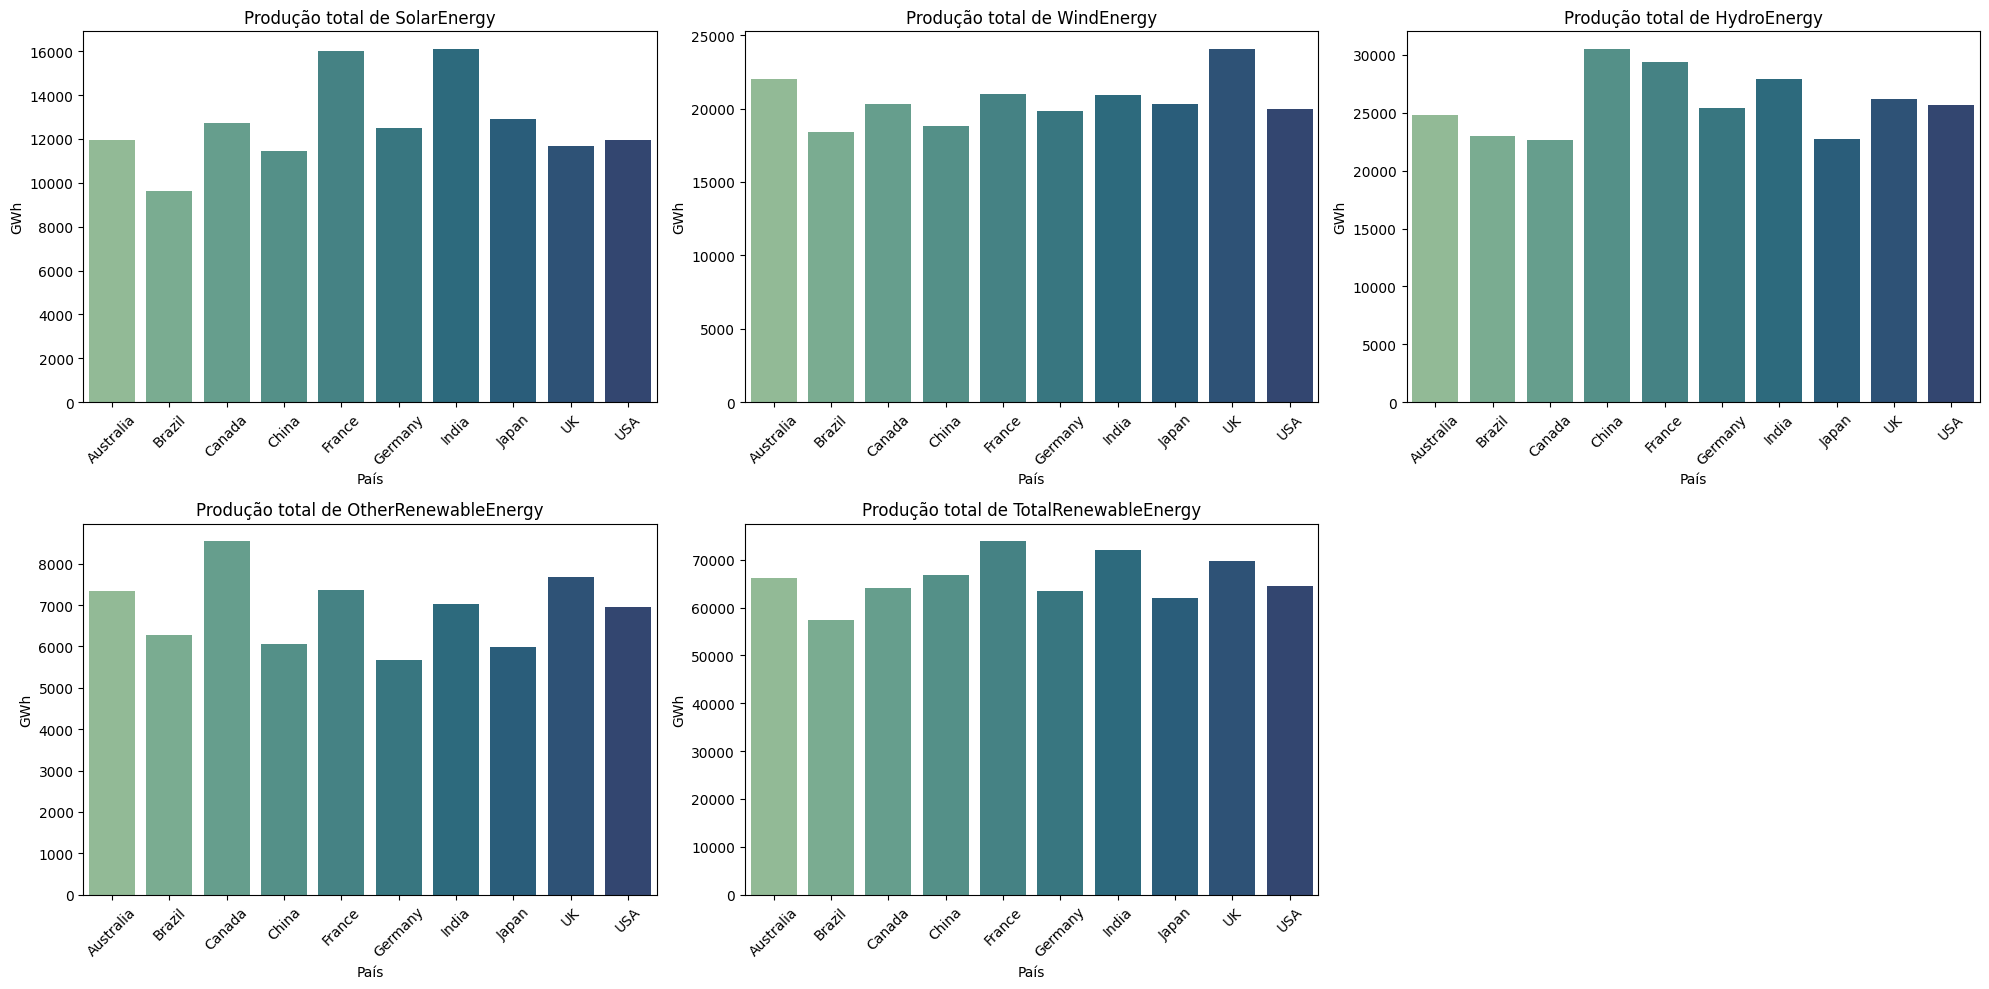

In [51]:
# Lista de fontes renováveis individuais
energy_sources = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']

# Agrupar por país e somar a produção ao longo dos anos
df_grouped = df.groupby('Country')[energy_sources].sum().reset_index()

# Criar uma grade de 2 linhas por 3 colunas
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes = axes.flatten()

# Criar um gráfico para cada tipo de energia
for i, energy in enumerate(energy_sources):
    sns.barplot(data=df_grouped, x='Country', y=energy, ax=axes[i], palette='crest')
    axes[i].set_title(f'Produção total de {energy}', fontsize=12)
    axes[i].set_ylabel('GWh')
    axes[i].set_xlabel('País')
    axes[i].tick_params(axis='x', rotation=45)

# Remove o sexto gráfico (último slot da grade, vazio)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [20]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

,std
Year,6.936653
SolarEnergy,271.183089
WindEnergy,375.020314
HydroEnergy,499.981598
OtherRenewableEnergy,128.460792
TotalRenewableEnergy,695.126957


# Gráfico para mostrar o desvio padrão

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Year'),
  Text(1, 0, 'SolarEnergy'),
  Text(2, 0, 'WindEnergy'),
  Text(3, 0, 'HydroEnergy'),
  Text(4, 0, 'OtherRenewableEnergy'),
  Text(5, 0, 'TotalRenewableEnergy')])

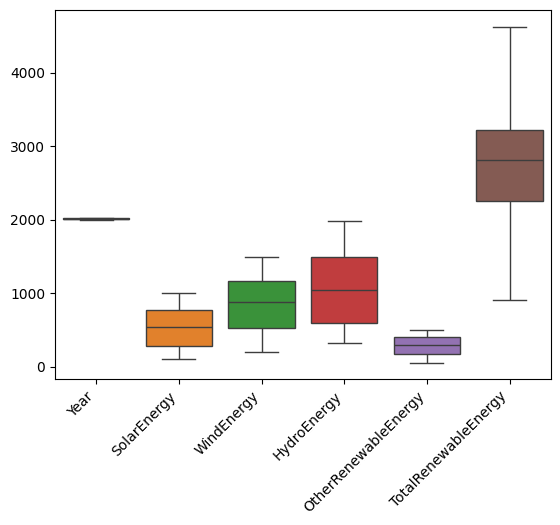

In [73]:
#O melhor gráfico para mostrar o desvio padrão é o boxplot. É compacto, robusto contra outliers e ótimo para comparações.
#Nele podemos ver a variação dos dados claramente, a mediana, os pontos mais altos, baixos e outliers de cada atributo.
sns.boxplot(data = df)
plt.xticks(rotation = 45, ha='right')


O nosso boxplot mostra um desvio padrão alto para todas as fontes de energia e para a produção total. Isso expõe uma grande variância na geração, seja absoluta, ou por fonte.


## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

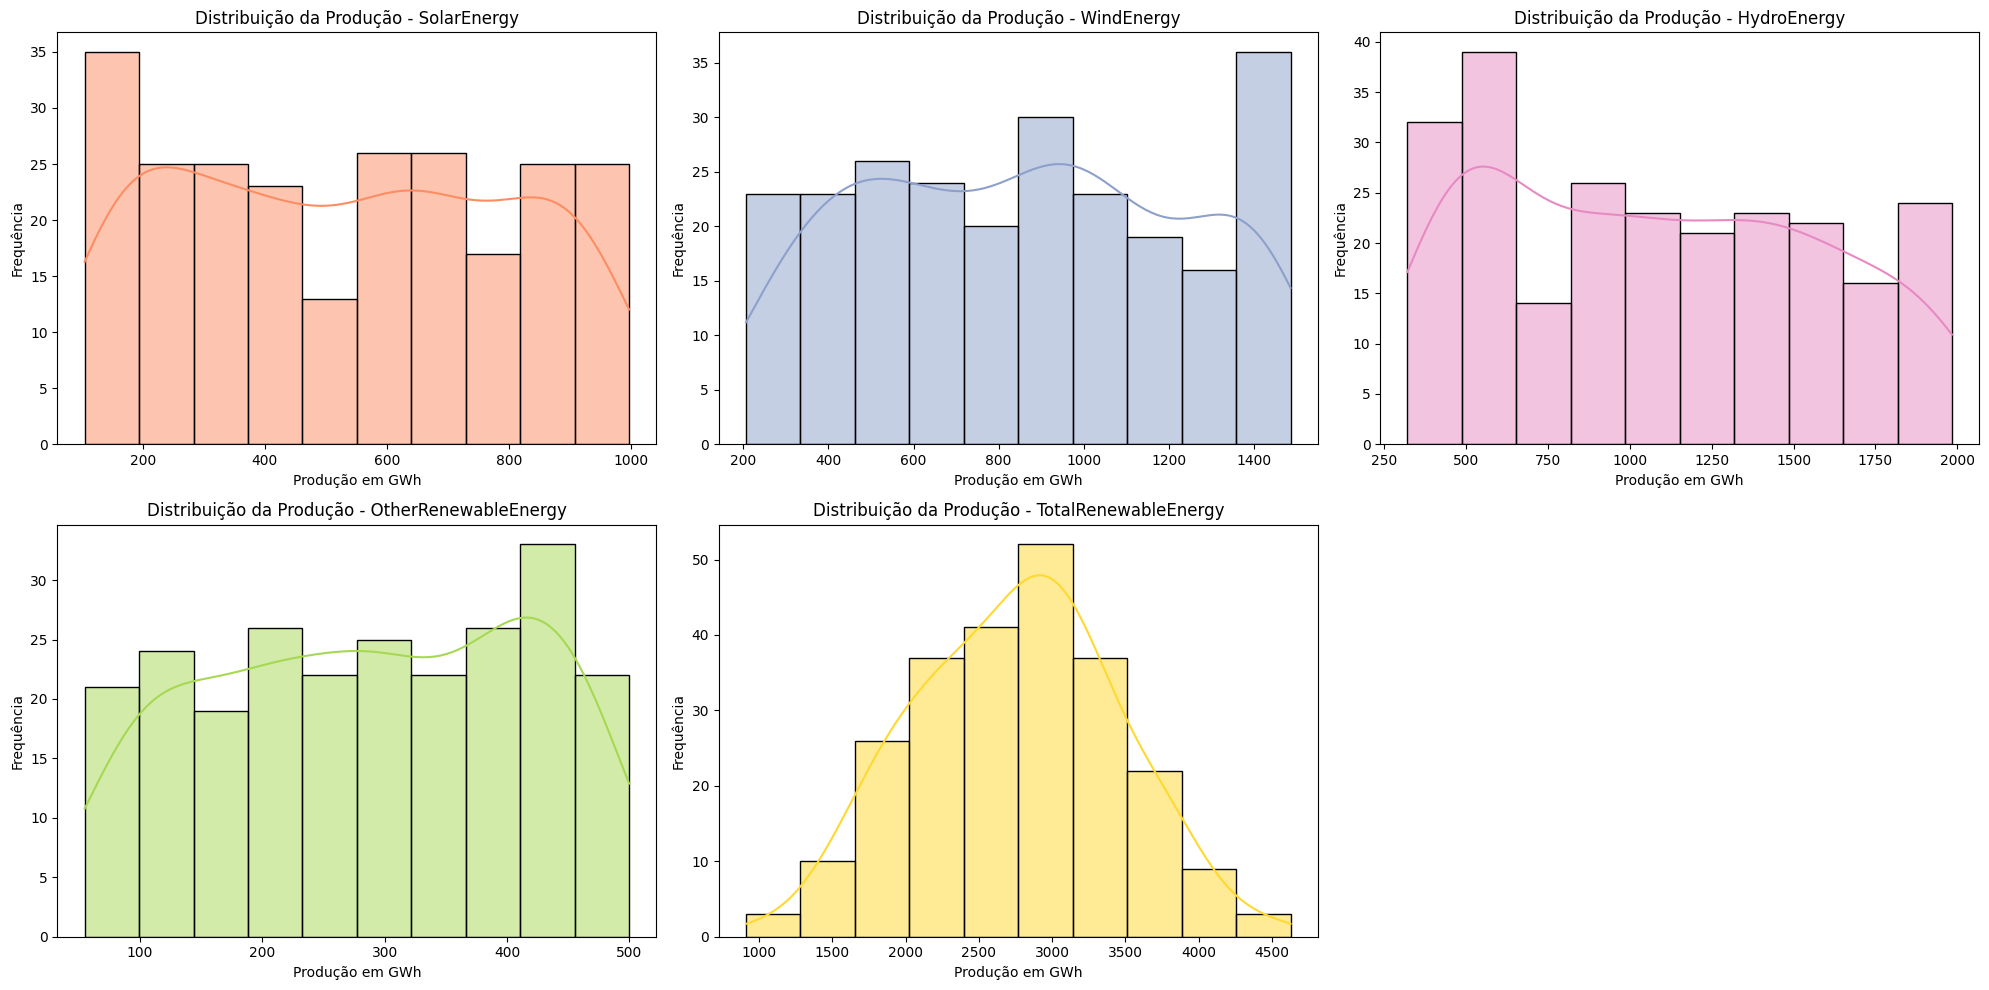

In [59]:
# Lista de colunas de energia renovável
colunas_energia = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']

# Paleta de cores definida
paleta = sns.color_palette('Set2')

# Tamanho total do painel
plt.figure(figsize=(20, 10))

# Loop pelos atributos de energia
for i, coluna in enumerate(colunas_energia, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=coluna, kde=True, bins=10, color=paleta[i % len(paleta)], edgecolor='black')
    plt.title(f'Distribuição da Produção - {coluna}', fontsize=12)
    plt.xlabel('Produção em GWh')
    plt.ylabel('Frequência')

# Ajuste de layout
plt.tight_layout()
plt.show()

O conjunto de histogramas nos aponta para algumas conclusões. Energia solar tem seu pico de frequência próximo ao valor mais baixo de geração, Próximo a 200 GWh. Já energia eólica tem seu pico no valor mais alto, em torno de 1400 GWh. Hidrelétrica e outras também apontam picos esporádicos, Hidrelétrica entre os valores mais baixos apresentados e Outras entre os mais altos.

A grande conclusão está Total gerado. Claramente conseguimos ver que o total gerado por ano gira, em sua esmagadora maioria, entre 2000 e 3500 GWh.

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


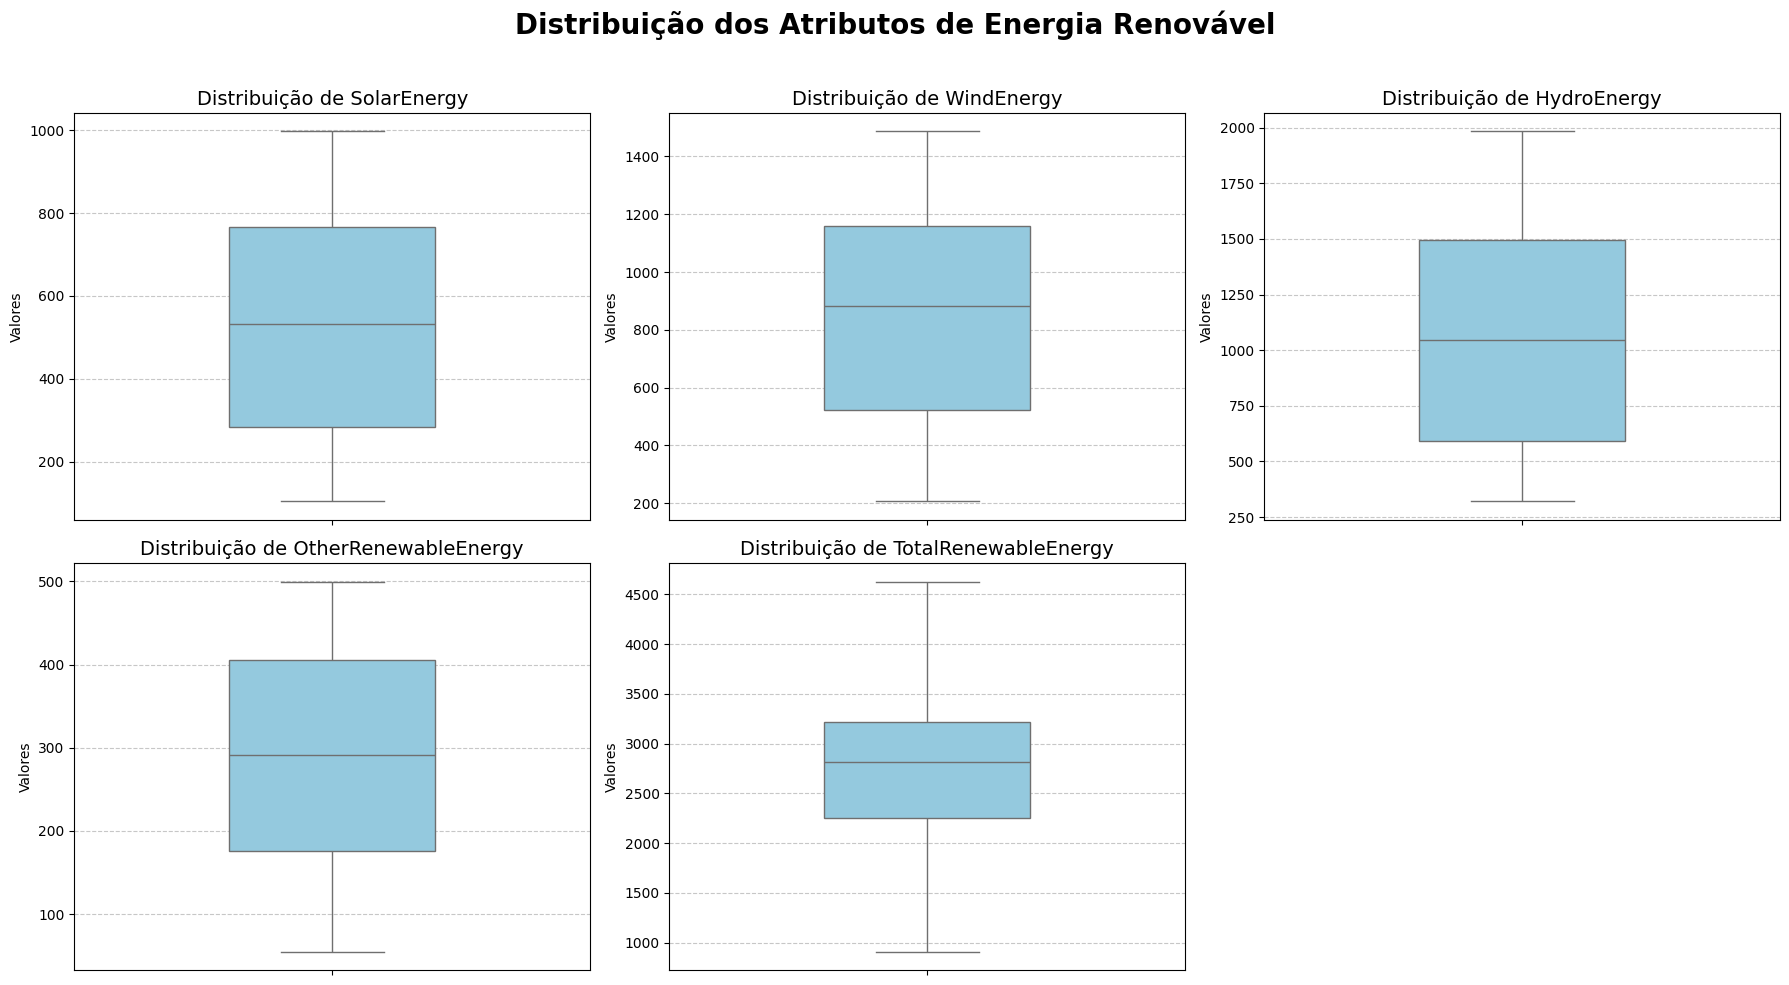

In [79]:
colunas_energia = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']

# IMPORTANTE: Verifique se esses nomes de colunas existem no seu DataFrame 'df'
# O código abaixo irá falhar se os nomes não corresponderem exatamente.
colunas_existentes = [col for col in colunas_energia if col in df.columns]
if len(colunas_existentes) != len(colunas_energia):
    print("\nAviso: Algumas colunas especificadas não foram encontradas no DataFrame.")
    print(f"Colunas encontradas: {colunas_existentes}")
    colunas_energia = colunas_existentes # Usaremos apenas as colunas que existem

# Cria uma figura e uma grade de subplots (2 linhas, 3 colunas)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Adiciona um título geral para toda a figura
fig.suptitle('Distribuição dos Atributos de Energia Renovável', fontsize=20, fontweight='bold')


# --- Passo 3: Loop para criar cada boxplot ---

# O método .flatten() transforma a matriz de eixos (2x3) em uma lista simples, facilitando o loop
axes_flat = axes.flatten()

for i, coluna in enumerate(colunas_energia):
    ax_atual = axes_flat[i] # Pega o subplot (eixo) atual da lista

    # Desenha um único boxplot no eixo atual
    # Usamos y=coluna para mostrar a distribuição dos valores daquela coluna
    sns.boxplot(data=df, y=coluna, ax=ax_atual, color= 'skyblue', width=0.4)

    # Personaliza cada subplot
    ax_atual.set_title(f'Distribuição de {coluna}', fontsize=14)
    ax_atual.set_xlabel('') # Remove o rótulo do eixo X, pois não há categorias
    ax_atual.set_ylabel('Valores', fontsize=10)
    ax_atual.grid(axis='y', linestyle='--', alpha=0.7)

# --- Passo 4: Ocultar o subplot vazio ---
# Como temos 5 gráficos em uma grade 2x3=6, o último eixo fica vazio. Vamos ocultá-lo.
for i in range(len(colunas_energia), len(axes_flat)):
    axes_flat[i].axis('off')

# --- Passo 5: Ajustar e exibir o gráfico ---
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta para dar espaço ao título geral
plt.show()


O conjunto de boxplots nos dá a oportunidade de olharmos para todos os gráficos e analisarmos a variação em cada um. De cara, conseguimos ver que o Total produzido geralmente fica bem estável, independente do ano.

As 3 fontes renováveis que aparecem nominalmente tem uma variação enorme de produção a depender do ano acompanhado.

## Matriz de Correlação

A matriz de correlação nos ajuda a compreender a relação entre múltiplas variáveis.

Matriz de Correlação (Tabela):
                      SolarEnergy  WindEnergy  HydroEnergy  \
SolarEnergy              1.000000   -0.046603    -0.063792   
WindEnergy              -0.046603    1.000000     0.047107   
HydroEnergy             -0.063792    0.047107     1.000000   
OtherRenewableEnergy    -0.041514    0.011408     0.104650   
TotalRenewableEnergy     0.311422    0.557309     0.739133   

                      OtherRenewableEnergy  TotalRenewableEnergy  
SolarEnergy                      -0.041514              0.311422  
WindEnergy                        0.011408              0.557309  
HydroEnergy                       0.104650              0.739133  
OtherRenewableEnergy              1.000000              0.250032  
TotalRenewableEnergy              0.250032              1.000000  


Visualização da Matriz de Correlação (Heatmap):


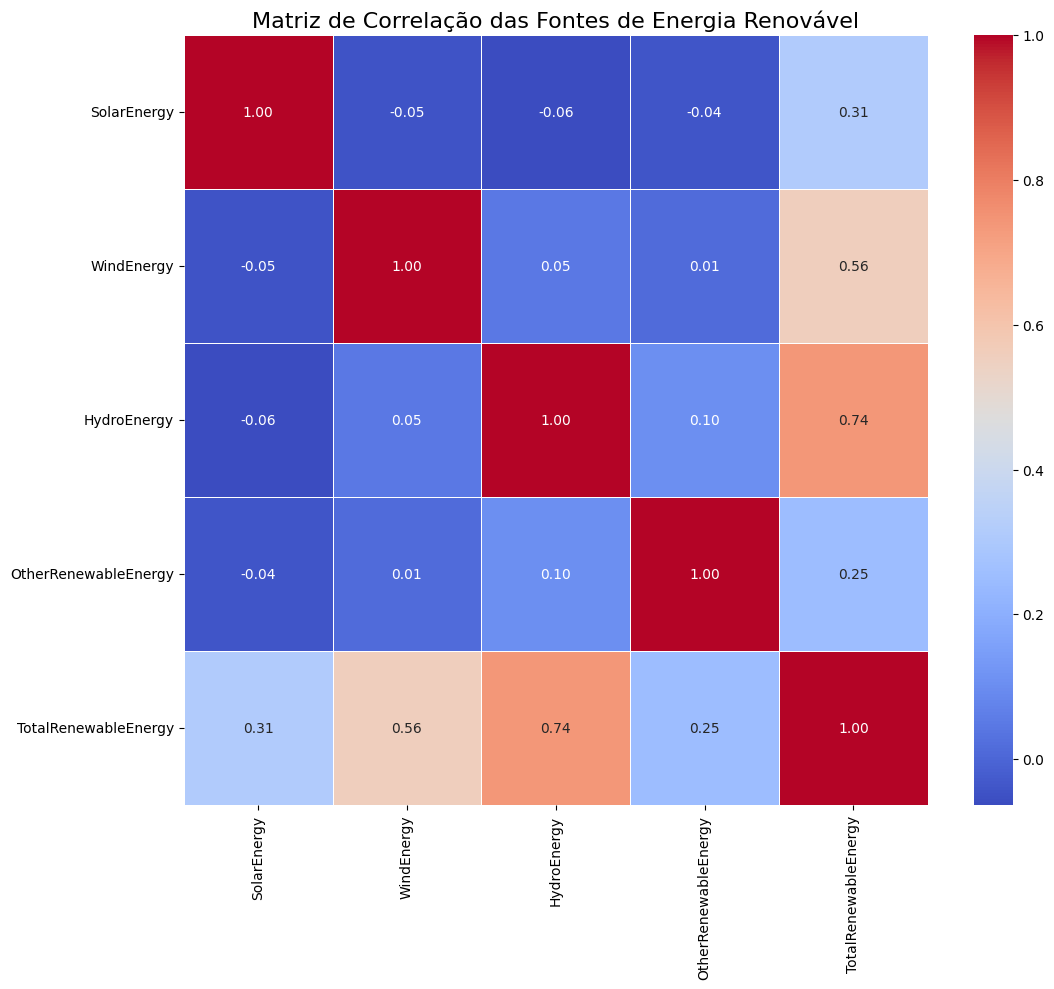

In [58]:
# 1. Selecionar apenas as colunas numéricas para o cálculo
numeric_df = df.select_dtypes(include='number')
# Vamos remover o ano e o país para focar nas relações entre as fontes de energia
if 'Year' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['Year'])
if 'Country' in numeric_df.columns: # Embora não seja numérico, é uma boa prática
    numeric_df = numeric_df.drop(columns=['Country'])


# 2. Calcular a Matriz de Correlação
# O método .corr() faz todo o trabalho pesado!
correlation_matrix = numeric_df.corr()

# Exibir a matriz como uma tabela (opcional)
print("Matriz de Correlação (Tabela):")
print(correlation_matrix)
print("\n" + "="*50 + "\n")


# 3. Visualizar a Matriz como um Heatmap
print("Visualização da Matriz de Correlação (Heatmap):")
plt.figure(figsize=(12, 10))

# A função heatmap do Seaborn é perfeita para isso
sns.heatmap(
    correlation_matrix,
    annot=True,         # annot=True mostra os números dentro de cada célula
    cmap='coolwarm',    # 'coolwarm' é uma ótima paleta: azul para negativo, vermelho para positivo
    fmt='.2f',          # Formata os números para terem duas casas decimais
    linewidths=.5       # Adiciona pequenas linhas para separar as células
)

plt.title('Matriz de Correlação das Fontes de Energia Renovável', fontsize=16)
plt.show()

A matriz de correlação evidencia que a fonte mais fortemente relacionada à produção total de energia renovável é a hidroelétrica (HydroEnergy), com um coeficiente de 0.74, indicando sua dominância na matriz energética dos países analisados. A energia eólica (WindEnergy) também apresenta uma correlação moderada positiva com o total (0.56), sugerindo seu papel relevante e em crescimento. Por outro lado, energia solar (0.31) e outras fontes renováveis (0.25) demonstram correlações mais fracas, o que pode indicar menor participação relativa ou distribuição desigual entre os países. As correlações baixas ou negativas entre as fontes individuais sugerem que, em geral, os países tendem a investir mais fortemente em uma ou duas fontes predominantes, ao invés de adotar uma diversificação energética ampla. Esse cenário abre espaço para investigações sobre a viabilidade e os desafios da diversificação das matrizes energéticas renováveis ao redor do mundo.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [80]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
Year,0
Country,0
SolarEnergy,0
WindEnergy,0
HydroEnergy,0
OtherRenewableEnergy,0
TotalRenewableEnergy,0


Como já era esperado, nosso dataset não possui nenhum valor nulo.

# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [88]:
# Separar features (X) e target (y)
X = df.drop('TotalRenewableEnergy', axis = 1)
y = df['TotalRenewableEnergy']
print("Dados separados em Features (X) e Target (y).")

Dados separados em Features (X) e Target (y).


In [89]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [90]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (192, 6)
Dimensões de X_test: (48, 6)
Dimensões de y_train: (192,)
Dimensões de y_test: (48,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [94]:
scaler = MinMaxScaler()
variaveis_numericas = ['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy', 'TotalRenewableEnergy']
df_norm = df.copy()
df_norm[variaveis_numericas] = scaler.fit_transform(df[variaveis_numericas])

In [92]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

ValueError: could not convert string to float: 'France'

In [95]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

NameError: name 'X_train_normalized' is not defined

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.208333           0.327586          0.416667
1           0.527778          0.083333           0.586207          0.583333
2           0.222222          0.750000           0.068966          0.083333
3           0.694444          0.500000           0.827586          0.916667
4           0.388889          0.333333           0.517241          0.500000


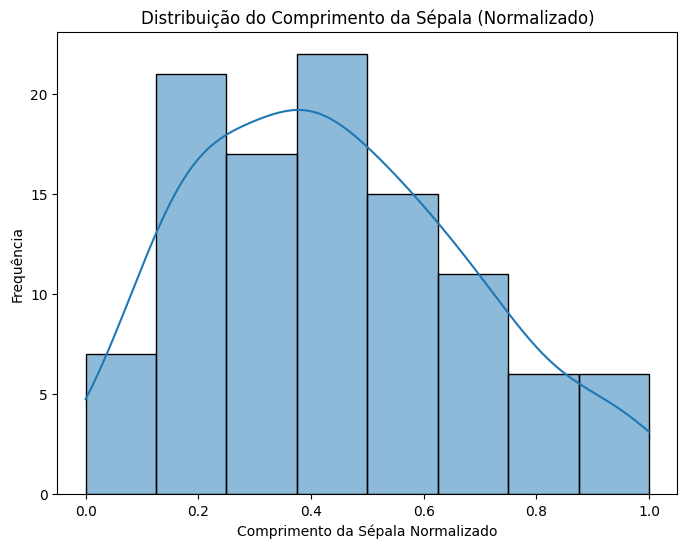

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


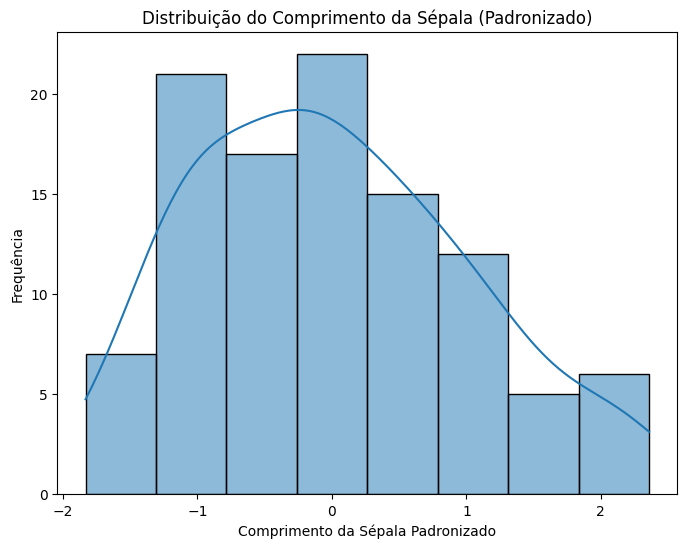

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.